# Find steepest descent path in beta plane

First we plot contours of $e^{i \beta z}$  in beta plane, then use formula found before for Z plane and translate to beta plane


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from IPython.display import HTML
from scipy.optimize import newton

plt.style.use('dark_background')

%matplotlib widget

## Antiguide

In [2]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=[1.44, 1, 1.44], wl=4e-6, symmetric=True)


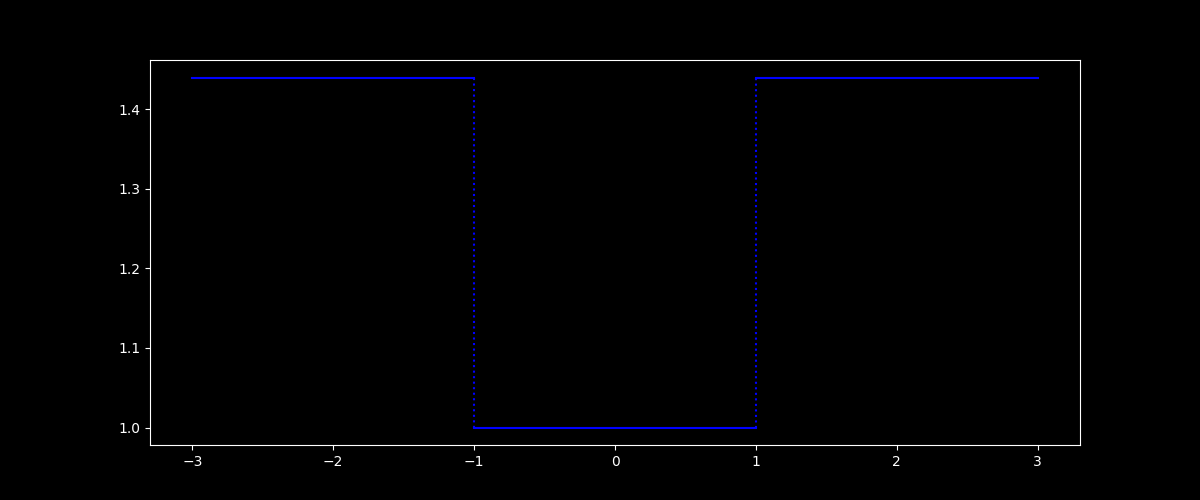

In [3]:
A.plot_refractive_index()

In [4]:
def gA(beta):
    return 1j * beta

Look at contour plot of exponent

In [5]:
xs, ys = np.linspace(-20, 20, 1001), np.linspace(-10, 10, 1001)
Xs, Ys = np.meshgrid(xs, ys)
Zs = Xs + 1j * Ys

gsA = gA(Zs)

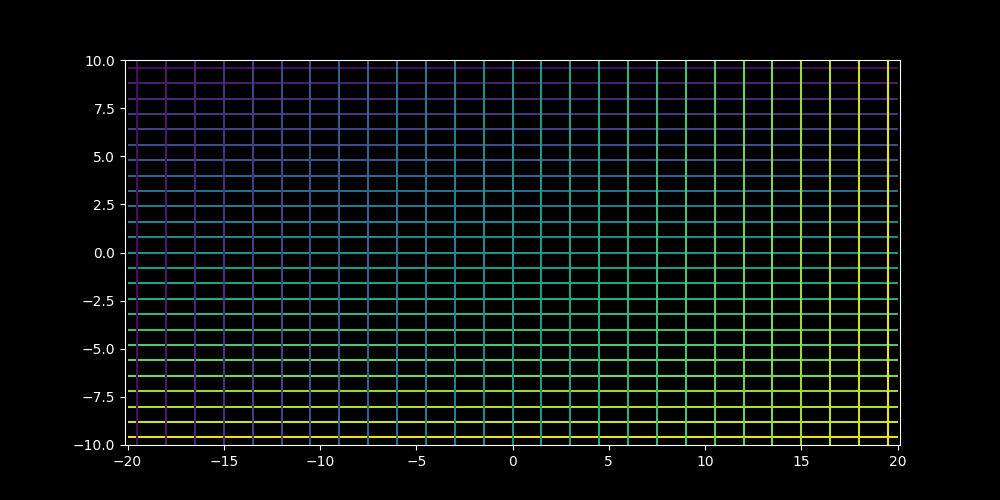

In [6]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,5))
ax.contour(Xs, Ys, gsA.real, levels=30)
ax.contour(Xs, Ys, gsA.imag, levels=30);
plt.axis('equal');

## Steepest descent paths

### In Z plane

We want to keep the imaginary part of $g(\beta) = i \beta$ constant at $\text{Im}(g(k_0 n_0)) = k_0 n_0$.  Using $\beta = x + y i$ we calculate that

$$ x = k_0 n_0$$

is the sdp.  Pretty straightforward.

In [7]:
def sdp_A(x):
    K = A.K0 * A.n0
    return K * np.ones_like(x)

In [8]:
ys2 = np.linspace(-10, 10, 2)
xs2 = sdp_A(ys2)

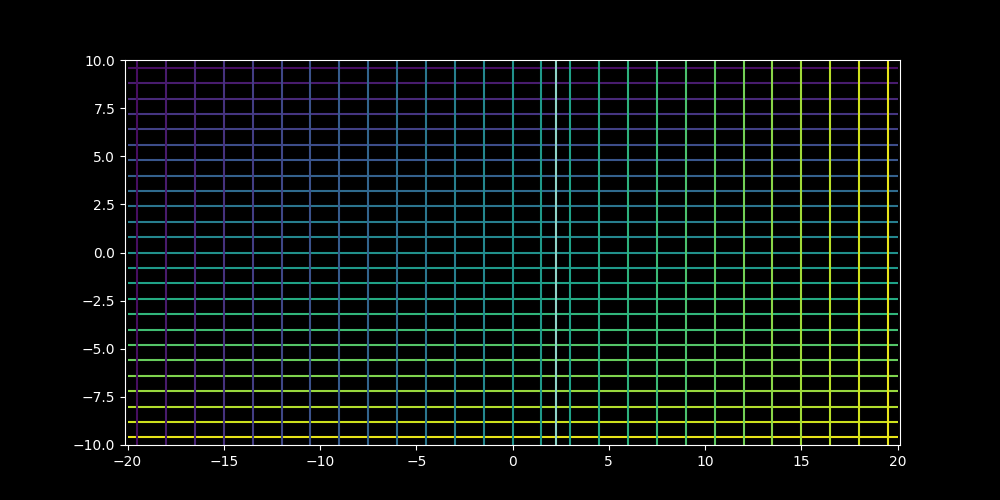

In [9]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,5))
ax.contour(Xs, Ys, gsA.real, levels=30)
ax.contour(Xs, Ys, gsA.imag, levels=30);
ax.plot(xs2, ys2);
plt.axis('equal');

### Adding in leaky mode locations

We can now overlay these paths onto our leaky mode propagation constant plots

In [10]:
A.wl =4e-6

In [11]:
args = ('TE', 'leaky')


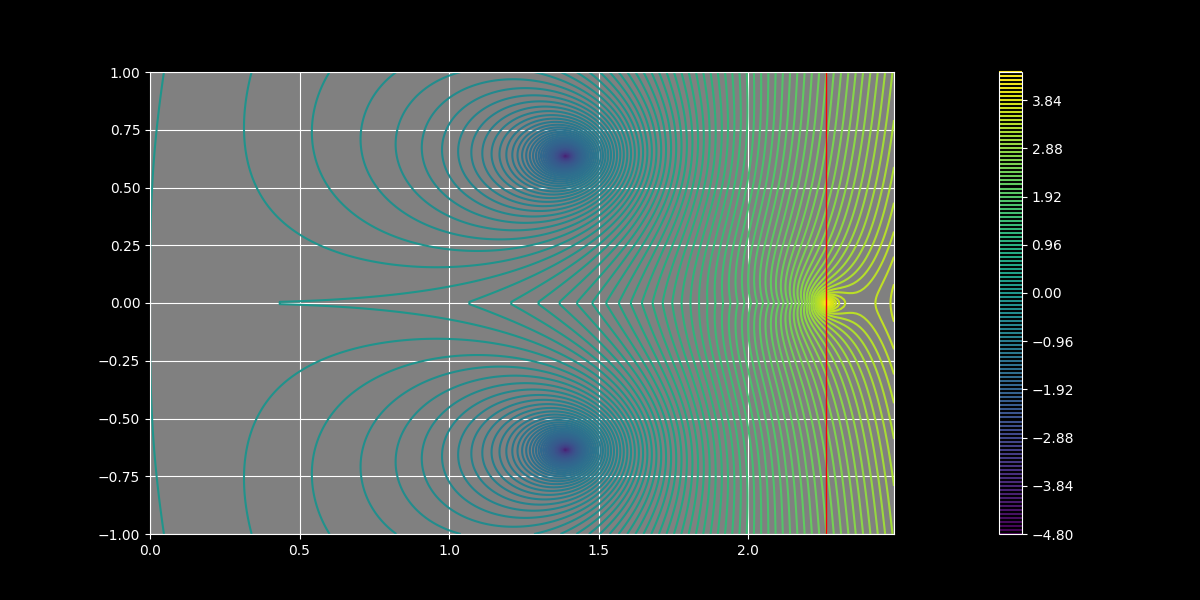

In [13]:
plotlogf(A.determinant,0, 1.1* A.K0 * A.n0, -1, 1,  *args, iref=200, rref=200, levels=120);
ax = plt.gca()
ys3 = np.linspace(-1, 1, 2)
xs3 = sdp_A(ys3)
ax.plot(xs3, ys3, lw=1, c='r');

A bit weird: in beta plane the sdp never changes, but eventually all the leaky modes should be on the wrong side of it for including in the asymptotics...  But we really never will have that right?  They would have to really move in a weird way.

In [14]:
minwl, maxwl = 2e-6, 1.2e-5
fps = 32
secs = 4
Nwl = fps * secs

In [15]:
# A.animate_propagation_constants(0, 6, -1, 5, mode_type='leaky', name='beta_prop_anim', wlmin=minwl, wlmax=maxwl, Nwl=Nwl, fps=fps,
#                                 variable='beta', levels=60, rref=160, iref=160, color_min=-3, color_max=9, dpi=300)

In [16]:

HTML("""
<video controls id="theVideo">
        <source src="beta_prop_anim.mp4">
</video>

<script>
video = document.getElementById("theVideo")
video.width = 1100;
video.playbackRate = .6;
</script>
""")


In [22]:
A.wl = 1e-5
beta1 = newton(A.determinant, 2, args=args)
beta1

(1.5333856572740778+0j)

In [23]:
F1 = A.fields(beta1, field_type='TE', mode_type='leaky')

leaky


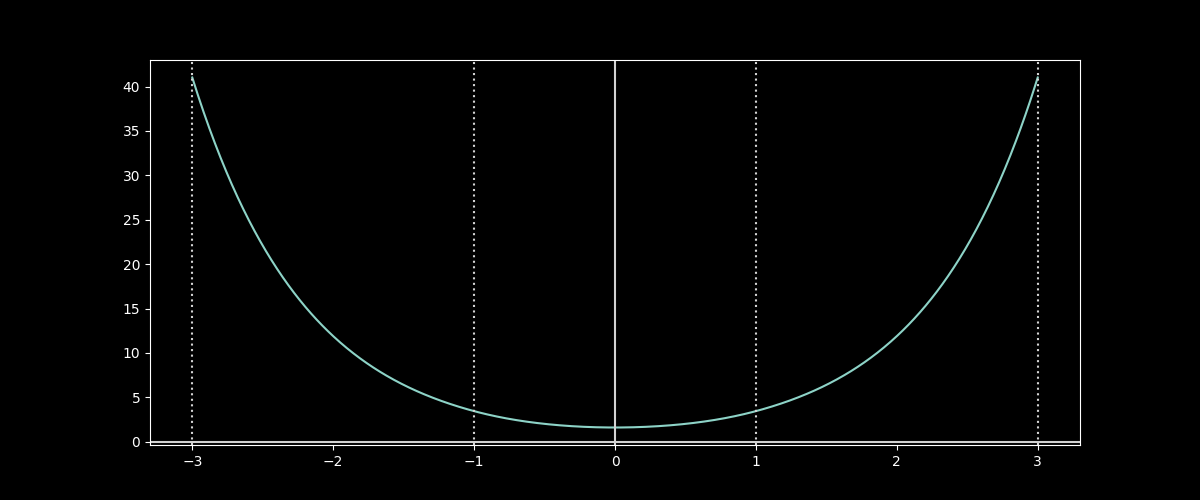

In [25]:
A.plot_field_1d(F1);

# 3 layer guide

In [23]:
B = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=[1.44, 1.5, 1.44], wl=4e-6, symmetric=True)


In [24]:
def sdp_B(x):
    K = B.K0 * B.n0
    return K * np.ones_like(x)

In [32]:
B.wl =2e-6

In [33]:
args = ('TE', 'guided', None, 'standard', 'standard')


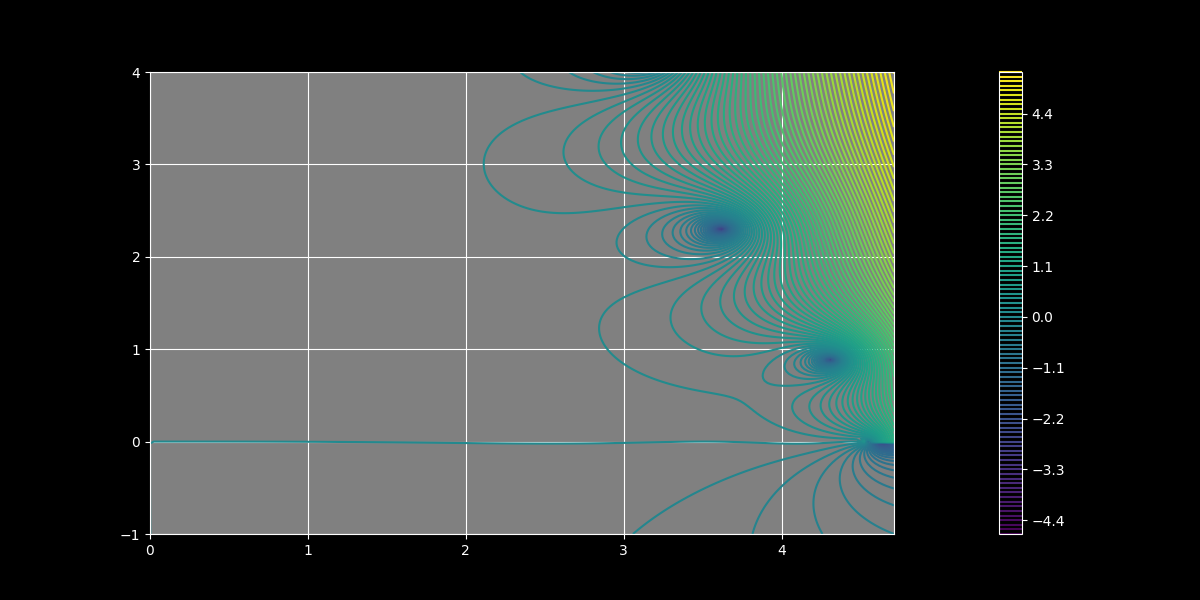

In [37]:
plotlogf(B.determinant, 0,   B.K_high, -1, 4,  *args, iref=200, rref=200, levels=120);
ax = plt.gca()
# ys3 = np.linspace(-.4, .8, 2)
# xs3 = sdp_B(ys3)
# ax.plot(xs3, ys3, lw=1, c='r');

In [97]:
minwl, maxwl = .8e-6, 3e-6
fps = 32
secs = 4
Nwl = fps * secs

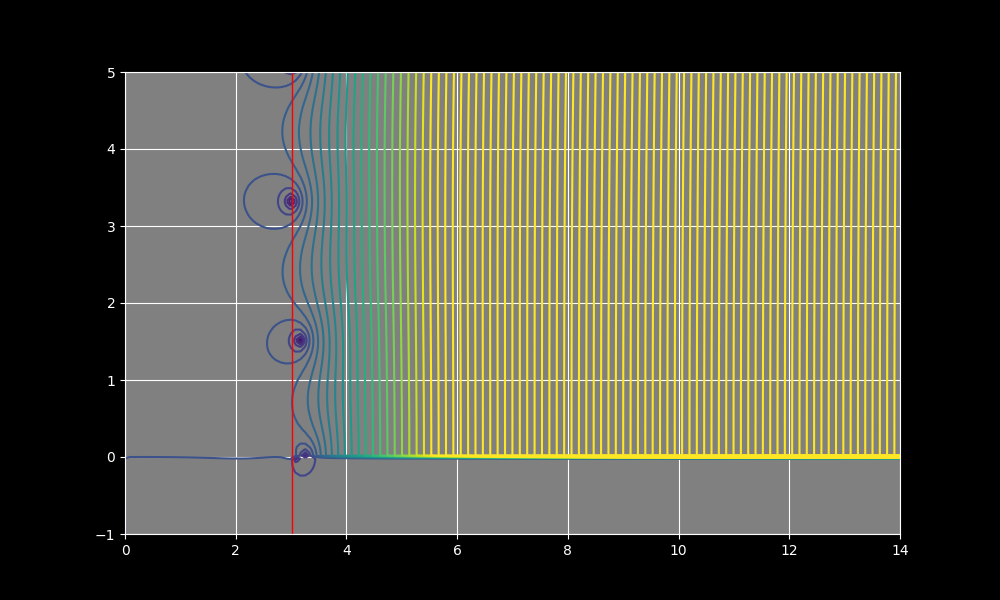

In [98]:
B.animate_propagation_constants(0, 14, -1, 5, mode_type='guided', name='beta_prop_anim2', wlmin=minwl, wlmax=maxwl, Nwl=Nwl, fps=fps,
                                variable='beta', levels=100, rref=160, iref=160, color_min=-3, color_max=9, dpi=300, Z_type='standard')

In [100]:
HTML(
    """
    <video controls id="theVideo2">
            <source src="beta_prop_anim2.mp4">
    </video>
    
    <script>
    video2 = document.getElementById("theVideo2")
    video2.width = 1100;
    video2.playbackRate = .4;
    </script>
    """
)
